# ห้ามลบ

- ในหน้านี้พลเป็นคนทำ
- ควรแก้ ในการยิง API ผมได้ใส่ parametor link ให้คุณเอา link สับย่อยมาใส่

##สิ่งที่แก้ไข

1.ทำการลดการ import

2.ลบหรือยุบตัวแปรที่ไม่ได้ใช้ออกเพื่อให้เข้าใจง่าย

3.เปลี่ยนแปลง API  ให้สามารถส่งลิ้งก์มาด้วย

4.ได้ทำการเปลี่ยน nan เป็น "" หรือ 0 สำเร็จแล้ว

5.uri_API  เพิ่มเส้น APi ไว้ด้านบนใต้ import เพื่อให้ง่ายในการแก้ไข

In [8]:
import requests,pandas as pd
uri_API = ''
data_link_for_lazada  = {
    0: 'อุปกรณ์-อิเล็กทรอนิกส์',
    1: 'อุปกรณ์เสริม-อิเล็กทรอนิกส์', 
    2: 'ทีวีและเครื่องใช้ในบ้าน', 
    3: 'สุขภาพและความงาม', 
    4: 'ทารกและของเล่น', 
    5: 'ของชำและสัตว์เลี้ยง', 
    6: 'บ้านและไลฟ์สไตล์', 
    7: 'แฟชั่นและเครื่องประดับผู้หญิง', 
    8: 'แฟชั่นและเครื่องประดับผู้ชาย',
    9: 'กีฬาและการเดินทาง',
    10: 'ยานยนต์และรถจักรยานยนต์'
    }
# head_excel
header = ['_95X4G href', 'jBwCF src', 'jBwCF src 2','RfADt', 'ooOxS','_1cEkb', 'qzqFw', 'oa6ri']
header_Values = {
    '_95X4G href':"product",
    'jBwCF src':"image_product_1",
    'jBwCF src 2':"image_product_2",
    'IcOsH':"discount",
    'RfADt':"data_product", 
    'ooOxS':"price_product",
    '_1cEkb':"sold",
    'qzqFw':"count_review", 
    'oa6ri':"place"
}

In [16]:
def postAPI_DB(data,id_shop,title_group,i1,link):
    """
    data: text ที่ทำการ += ในตัวแปร success_data_text
    id_shop : shop1_1_1
    title_group:หมวดหมู่กลุ่ม
    i1:กลุ่มหลัก 1 
    link: link หมวดหลัก
    """
    try:
        response = requests.post(
            f"{uri_API}addb?id={id_shop}&&web=lazada&&group={title_group}&&title_group={title_group}&&link={link}",
            headers={
                "Content-type":"application/x-www-form-urlencoded"
            },
            data={
                "data":data
            }
        )
        print(response.text)
        return {"status":200,"message":"POST API SUCCESS."}
    except:
        return {"status":404,"message":"POST API ERROR."}

APRODUCT:::maket:::lazada, group:::อุปกรณ์-อิเล็กทรอนิกส์, product:::https://www.lazada.co.th/products/xiaomi-redmi-13c-global-version-mtk-helio-g85-674-large-display-side-fingerprint-50mp-camera-5000mah-i5033801470.html?spm=a2o4m.searchlistcategory.list.1.2ce851ee8QpPxD, price_product_2:::, price_product_1:::10099.0, image_product_1:::https://lzd-img-global.slatic.net/g/p/fff4464b0677ae8b225be0e74535a727.png_200x200q80.png_.webp, discount:::[], image_product_2:::https://lzd-img-global.slatic.net/g/p/3f2f7674c283f6ff21eaed5434e6c956.png_80x80q80.png_.webp, data_product:::Xiaomi Redmi 13C Global Version MTK Helio G85  6.74" Large Display Side Fingerprint 50MP Camera 5000mAh, price_before:::, Emoji:::, sold:::0, place:::กรุงเทพมหานคร, Recommended_shops:::, count_review:::0APRODUCT:::maket:::lazada, group:::อุปกรณ์-อิเล็กทรอนิกส์, product:::https://www.lazada.co.th/products/galaxy-a54-5g8256gbhd5000mah-i5023693215.html?spm=a2o4m.searchlistcategory.list.6.2ce851ee8QpPxD, price_product_2:::
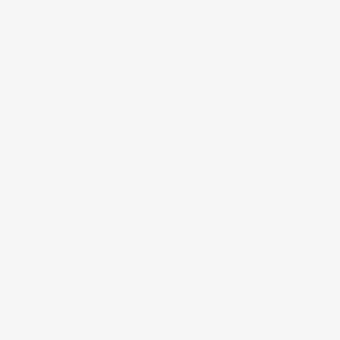
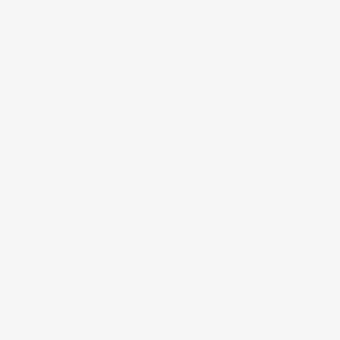
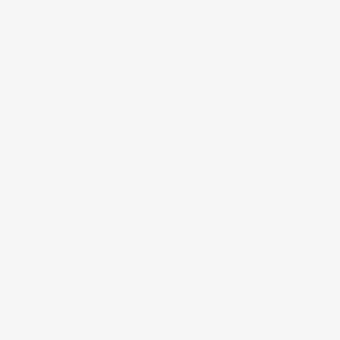
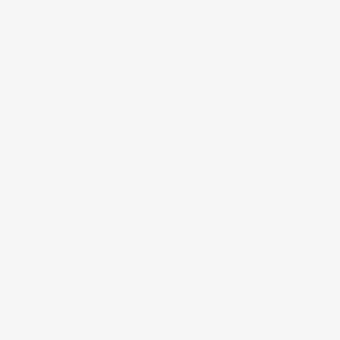
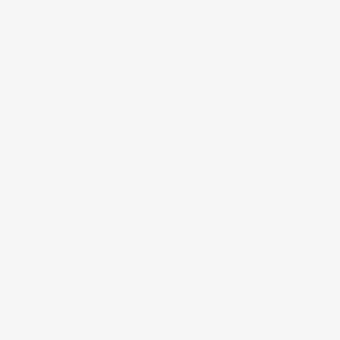
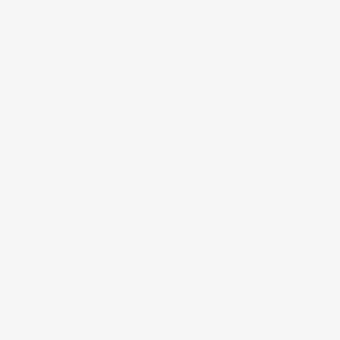
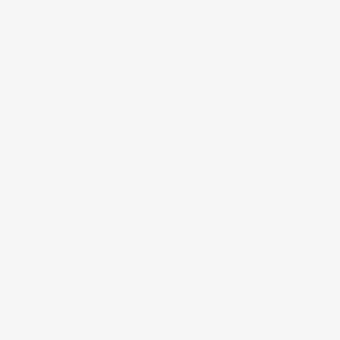
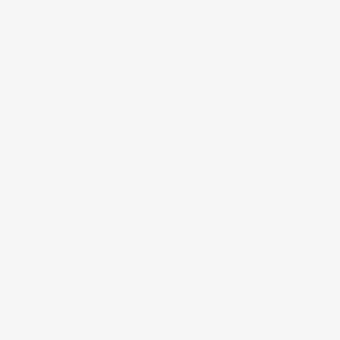
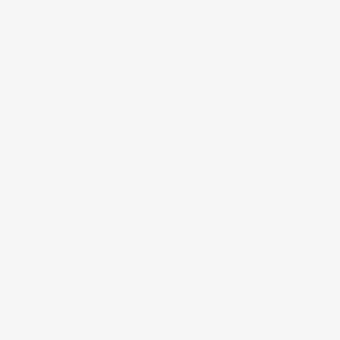
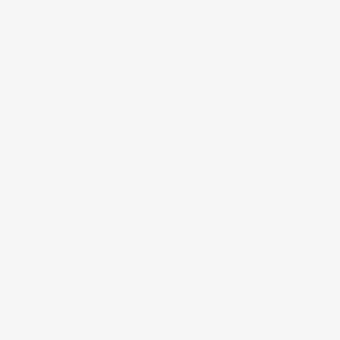
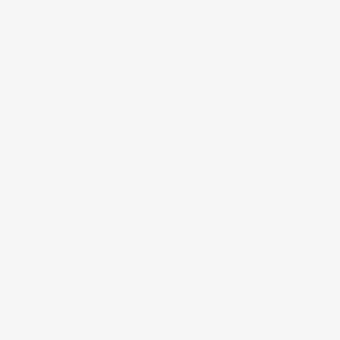
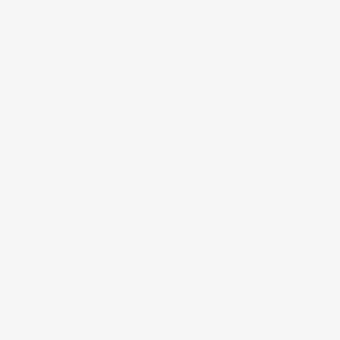
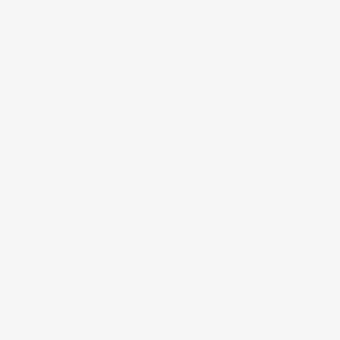
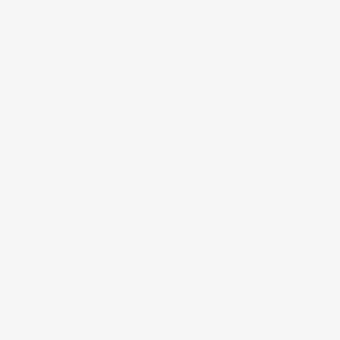
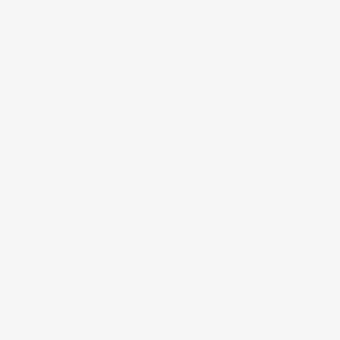
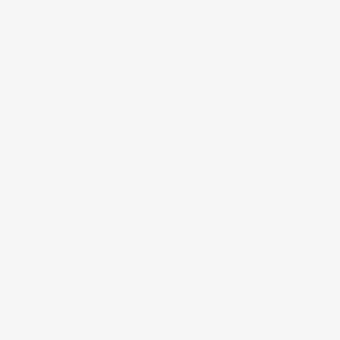
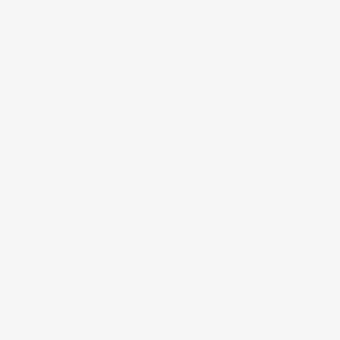
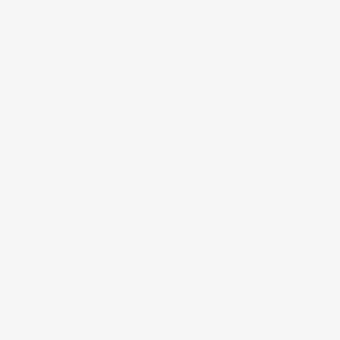

In [18]:
from data_address import address as ad
uri_API = 'https://b18f-223-206-131-122.ngrok-free.app/'

def data_process(path_file,i1,i2,i3,group,link):
    """
    Process : เพื่อจัดตำแหน่งข้อมูลให้สามารถป้อนเข้า Data Base ได้
    Args:
        path_file: ไฟล์ข้อมูล excel ที่โหลดมาด้วยโปเกบอล อ่านเพื่อแปลงข้อมูลเป็น json
        i1: รอบการทำงานใหญ่ที่สุด ก็คือ หมวดหมู่
        i2: รอบการทำงานกลาง ก็คือ หมวดหมู่ สับย่อยลงมา
        i3: รอบการทำงานเล็กสุด ก็คือ หน้าแต่ละหน้าของสับย่อย ที่เราให้ไปอ่านแล้วกดโหลด
        group: _description_
    """
    try:
        read_excel = pd.read_excel(path_file);
        num_rows, num_columns = read_excel.shape
        success_data_text = ""
        for i in range(num_rows):
            data_process = {
                "product":[],
                "price_product_2":[],
                "price_product_1":[],
                "image_product_1":[],
                "discount":[],
                "image_product_2":[],
                "data_product":[],
                "price_before":[],
                "Emoji":[],
                "sold":[],
                "place":[],
                "Recommended_shops":[],
                "count_review":[],
                "maket":[],
                "group":[]
            }
            data = "Product_"+str(i+1);
            for j in range(len(header)):
                data_input = str(read_excel[header[j]][i]);
                data_process[header_Values[header[j]]]=data_input;
            # ****************************************************************
            Product = {}
            Product[data]= data_process
            Product[data]["maket"]="lazada"
            Product[data]["group"]=group
            id_shop = f'shop{i1}_{i2}_{i3}'
            # ****************************************************************
            product = Product[data]["product"]
            image_product_1 = Product[data]["image_product_1"]
            image_product_2 = Product[data]["image_product_2"]
            discount = Product[data]["discount"]
            data_product = Product[data]["data_product"]
            price_product = float(Product[data]["price_product"].replace("฿","").replace(",",""))
            price_product = (price_product<=0)and "0" or price_product
            sold = (Product[data]["sold"].split(" ")[0]=="nan")and "0" or type(Product[data]["sold"].split(" ")[0] )
            address = (Product[data]["place"]=='nan')and "" or ad[Product[data]["place"]]
            count_review = (Product[data]["count_review"]=="nan")and "0" or Product[data]["count_review"]
            maket = Product[data]["maket"]
            # ****************************************************************
            success_data_text += f'APRODUCT:::maket:::{maket}, group:::{group}, product:::{product}, price_product_2:::{""}, price_product_1:::{price_product}, image_product_1:::{image_product_1}, discount:::{discount}, image_product_2:::{image_product_2}, data_product:::{data_product}, price_before:::{""}, Emoji:::{""}, sold:::{sold}, place:::{address}, Recommended_shops:::{""}, count_review:::{count_review}'
            # ถ้าข้อมูลครบ 60 ค่อยบันทึก .json และส่ง API
            if(i==num_rows-1):
                print(success_data_text)
                print(postAPI_DB(success_data_text,id_shop,group,i1,link));
    except Exception as e:
        print(f"data_process : error ==> i1:{i1}, i2:{i2}, i3:{i3}")
        print(e);
data_process('../Bot_lazada/Data_lazada_test_api/data_1_1_30.xlsx',1,1,1,'อุปกรณ์-อิเล็กทรอนิกส์',"https://www.lazada.co.th/shop-mobiles")

In [ ]:
from Province import provinces as gi
print("{")
for i in range(len(gi)):
    key = gi[i][1];
    value = gi[i][0]
    print("'%s':'%s',"%(key,value));
print("}")